In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

40


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.54223 stdev: 0.15021
Best fitness: 0.76994 - size: (2, 13) - species 2 - id 54
Average adjusted fitness: 0.260
Mean genetic distance 2.899, standard deviation 0.459
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60680 stdev: 0.13451
Best fitness: 0.78912 - size: (3, 15) - species 2 - id 345
Average adjusted fitness: 0.294
Mean genetic distance 3.019, standard deviation 0.447
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 21.977 sec (16.171 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62768 stdev: 0.13564
Best fitness: 0.79159 - size: (4, 15) - species 21 - id 454
Average adjusted fitness: 0.330
Mean genetic distance 3.065, standard deviation 0.456
Population of 199 members in 38 species
Total extin

Population's average fitness: 0.60426 stdev: 0.08929
Best fitness: 0.76809 - size: (5, 17) - species 8 - id 1138
Average adjusted fitness: 0.315
Mean genetic distance 3.184, standard deviation 0.535
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 29.446 sec (25.247 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62130 stdev: 0.08326
Best fitness: 0.76809 - size: (5, 17) - species 8 - id 1138
Average adjusted fitness: 0.277
Mean genetic distance 3.195, standard deviation 0.525
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 27.372 sec (25.978 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61070 stdev: 0.08966
Best fitness: 0.76809 - size: (5, 19) - species 24 - id 1866
Average adjusted fitness: 0.186
Mean genetic distance 3.184, standard deviation 0.536
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 29.681 sec (26.755 average)

 **

Population's average fitness: 0.56183 stdev: 0.09151
Best fitness: 0.72913 - size: (2, 13) - species 14 - id 315
Average adjusted fitness: 0.222
Mean genetic distance 2.916, standard deviation 0.449
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 22.701 sec (23.515 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56651 stdev: 0.09710
Best fitness: 0.75696 - size: (3, 16) - species 10 - id 780
Average adjusted fitness: 0.239
Mean genetic distance 2.999, standard deviation 0.455
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 23.688 sec (23.550 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57679 stdev: 0.10073
Best fitness: 0.76500 - size: (5, 20) - species 20 - id 942
Average adjusted fitness: 0.216
Mean genetic distance 3.071, standard deviation 0.487
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.737 sec (23.581 average)

 *****

Population's average fitness: 0.77477 stdev: 0.22365
Best fitness: 0.93197 - size: (5, 18) - species 15 - id 1475
Average adjusted fitness: 0.643
Mean genetic distance 3.077, standard deviation 0.528
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 21.512 sec (20.524 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.79226 stdev: 0.20294
Best fitness: 0.93197 - size: (5, 18) - species 15 - id 1475
Average adjusted fitness: 0.661
Mean genetic distance 3.126, standard deviation 0.527
Population of 210 members in 40 species
Total extinctions: 0
Generation time: 20.948 sec (20.612 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.79391 stdev: 0.20985
Best fitness: 0.93197 - size: (5, 18) - species 15 - id 1475
Average adjusted fitness: 0.671
Mean genetic distance 3.129, standard deviation 0.514
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 22.320 sec (20.901 average)
nu

Population's average fitness: 0.68747 stdev: 0.18544
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 669
Average adjusted fitness: 0.478
Mean genetic distance 3.084, standard deviation 0.487
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 20.884 sec (19.378 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69350 stdev: 0.18435
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 669
Average adjusted fitness: 0.485
Mean genetic distance 3.077, standard deviation 0.486
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 20.464 sec (19.514 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70886 stdev: 0.17543
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 669
Average adjusted fitness: 0.501
Mean genetic distance 3.096, standard deviation 0.484
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 21.178 sec (19.699 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51575 stdev: 0.09140
Best fitness: 0.72789 - size: (2, 13) - species 1 - id 140
Average adjusted fitness: 0.210
Mean genetic distance 2.860, standard deviation 0.435
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.207 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56129 stdev: 0.09437
Best fitness: 0.75263 - size: (3, 15) - species 13 - id 321
Average adjusted fitness: 0.275
Mean genetic distance 2.926, standard deviation 0.459
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 18.380 sec (17.793 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59098 stdev: 0.09706
Best fitness: 0.77860 - size: (3, 15) - species 13 - id 537
Average adjusted fitness: 0.275
Mean genetic distance 2.955, standard deviation 0.490
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 18.851 sec (18

Population's average fitness: 0.58592 stdev: 0.06754
Best fitness: 0.72542 - size: (5, 21) - species 26 - id 1429
Average adjusted fitness: 0.181
Mean genetic distance 3.172, standard deviation 0.506
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 21.584 sec (19.536 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58771 stdev: 0.07246
Best fitness: 0.72542 - size: (5, 21) - species 26 - id 1429
Average adjusted fitness: 0.197
Mean genetic distance 3.182, standard deviation 0.502
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 21.980 sec (20.042 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59771 stdev: 0.06580
Best fitness: 0.72542 - size: (5, 21) - species 26 - id 1429
Average adjusted fitness: 0.128
Mean genetic distance 3.180, standard deviation 0.498
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 21.337 sec (20.385 average)

 

Population's average fitness: 0.63611 stdev: 0.12961
Best fitness: 0.82189 - size: (3, 15) - species 1 - id 669
Average adjusted fitness: 0.354
Mean genetic distance 3.102, standard deviation 0.470
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 20.315 sec (19.160 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63207 stdev: 0.13579
Best fitness: 0.82189 - size: (3, 15) - species 1 - id 669
Average adjusted fitness: 0.384
Mean genetic distance 3.129, standard deviation 0.465
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 20.761 sec (19.480 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64620 stdev: 0.12584
Best fitness: 0.82189 - size: (3, 15) - species 1 - id 669
Average adjusted fitness: 0.382
Mean genetic distance 3.109, standard deviation 0.464
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 20.878 sec (19.713 average)

 ****** R

Population's average fitness: 0.71606 stdev: 0.15688
Best fitness: 0.82684 - size: (3, 16) - species 34 - id 1736
Average adjusted fitness: 0.510
Mean genetic distance 3.034, standard deviation 0.495
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 20.805 sec (20.601 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.73368 stdev: 0.12879
Best fitness: 0.82684 - size: (3, 16) - species 34 - id 1736
Average adjusted fitness: 0.523
Mean genetic distance 3.016, standard deviation 0.499
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 21.693 sec (20.822 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73537 stdev: 0.14456
Best fitness: 0.83859 - size: (3, 17) - species 34 - id 2128
Average adjusted fitness: 0.517
Mean genetic distance 3.013, standard deviation 0.489
Population of 192 members in 36 species
Total extinctions: 0
Generation time: 21.509 sec (20.908 average)
nu

Population's average fitness: 0.59143 stdev: 0.08433
Best fitness: 0.76005 - size: (4, 15) - species 18 - id 495
Average adjusted fitness: 0.262
Mean genetic distance 3.080, standard deviation 0.483
Population of 201 members in 51 species
Total extinctions: 0
Generation time: 20.795 sec (19.437 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58619 stdev: 0.08827
Best fitness: 0.76005 - size: (4, 15) - species 18 - id 495
Average adjusted fitness: 0.255
Mean genetic distance 3.095, standard deviation 0.484
Population of 200 members in 51 species
Total extinctions: 0
Generation time: 20.524 sec (19.573 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59664 stdev: 0.08496
Best fitness: 0.76005 - size: (4, 15) - species 18 - id 495
Average adjusted fitness: 0.238
Mean genetic distance 3.094, standard deviation 0.491
Population of 204 members in 51 species
Total extinctions: 0
Generation time: 20.763 sec (19.705 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46966 stdev: 0.08621
Best fitness: 0.75943 - size: (2, 13) - species 5 - id 51
Average adjusted fitness: 0.151
Mean genetic distance 2.920, standard deviation 0.539
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53779 stdev: 0.09706
Best fitness: 0.76252 - size: (3, 15) - species 8 - id 202
Average adjusted fitness: 0.192
Mean genetic distance 3.019, standard deviation 0.552
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 18.070 sec (17.613 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55582 stdev: 0.10932
Best fitness: 0.76252 - size: (3, 15) - species 8 - id 202
Average adjusted fitness: 0.216
Mean genetic distance 3.125, standard deviation 0.535
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.513 sec (17.91

Population's average fitness: 0.58684 stdev: 0.07311
Best fitness: 0.74644 - size: (5, 19) - species 12 - id 1409
Average adjusted fitness: 0.189
Mean genetic distance 3.253, standard deviation 0.507
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 20.856 sec (19.829 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59227 stdev: 0.07435
Best fitness: 0.74644 - size: (5, 19) - species 12 - id 1409
Average adjusted fitness: 0.211
Mean genetic distance 3.273, standard deviation 0.510
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.047 sec (20.337 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60534 stdev: 0.06573
Best fitness: 0.74644 - size: (5, 19) - species 12 - id 1409
Average adjusted fitness: 0.216
Mean genetic distance 3.265, standard deviation 0.508
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 22.208 sec (20.767 average)

 

Population's average fitness: 0.66947 stdev: 0.18449
Best fitness: 0.86889 - size: (4, 16) - species 27 - id 675
Average adjusted fitness: 0.441
Mean genetic distance 3.051, standard deviation 0.466
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 19.657 sec (18.481 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65297 stdev: 0.19991
Best fitness: 0.86889 - size: (4, 16) - species 27 - id 675
Average adjusted fitness: 0.450
Mean genetic distance 3.078, standard deviation 0.469
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 20.289 sec (18.842 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66492 stdev: 0.21159
Best fitness: 0.88126 - size: (4, 16) - species 27 - id 957
Average adjusted fitness: 0.460
Mean genetic distance 3.081, standard deviation 0.492
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 20.684 sec (19.149 average)

 *****

Population's average fitness: 0.66921 stdev: 0.10042
Best fitness: 0.78973 - size: (5, 17) - species 16 - id 1429
Average adjusted fitness: 0.365
Mean genetic distance 3.085, standard deviation 0.495
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 21.971 sec (20.955 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66169 stdev: 0.11658
Best fitness: 0.78973 - size: (5, 17) - species 16 - id 1429
Average adjusted fitness: 0.378
Mean genetic distance 3.088, standard deviation 0.500
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 21.730 sec (21.134 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66660 stdev: 0.10809
Best fitness: 0.78973 - size: (5, 17) - species 16 - id 1429
Average adjusted fitness: 0.365
Mean genetic distance 3.108, standard deviation 0.510
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 22.376 sec (21.348 average)
nu

Population's average fitness: 0.61390 stdev: 0.11073
Best fitness: 0.83859 - size: (4, 18) - species 5 - id 805
Average adjusted fitness: 0.262
Mean genetic distance 3.177, standard deviation 0.454
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.275 sec (19.395 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61767 stdev: 0.11153
Best fitness: 0.83859 - size: (4, 18) - species 5 - id 805
Average adjusted fitness: 0.262
Mean genetic distance 3.182, standard deviation 0.478
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 21.958 sec (19.715 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63149 stdev: 0.10483
Best fitness: 0.83859 - size: (4, 18) - species 5 - id 805
Average adjusted fitness: 0.250
Mean genetic distance 3.193, standard deviation 0.467
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 21.811 sec (19.948 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.44256 stdev: 0.14991
Best fitness: 0.76376 - size: (2, 13) - species 6 - id 156
Average adjusted fitness: 0.211
Mean genetic distance 2.904, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.204 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52512 stdev: 0.15185
Best fitness: 0.76376 - size: (2, 13) - species 7 - id 156
Average adjusted fitness: 0.289
Mean genetic distance 2.978, standard deviation 0.491
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 17.989 sec (17.596 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59908 stdev: 0.13408
Best fitness: 0.76376 - size: (2, 14) - species 2 - id 529
Average adjusted fitness: 0.295
Mean genetic distance 3.040, standard deviation 0.514
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 19.472 sec (18.2

Population's average fitness: 0.64824 stdev: 0.11094
Best fitness: 0.81571 - size: (3, 16) - species 23 - id 1060
Average adjusted fitness: 0.284
Mean genetic distance 3.150, standard deviation 0.507
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 21.525 sec (19.797 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65062 stdev: 0.11024
Best fitness: 0.81571 - size: (3, 16) - species 23 - id 1060
Average adjusted fitness: 0.345
Mean genetic distance 3.168, standard deviation 0.502
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 21.024 sec (20.186 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65258 stdev: 0.10693
Best fitness: 0.81571 - size: (3, 16) - species 23 - id 1060
Average adjusted fitness: 0.303
Mean genetic distance 3.172, standard deviation 0.498
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 21.197 sec (20.472 average)

 

Population's average fitness: 0.60841 stdev: 0.13089
Best fitness: 0.81942 - size: (3, 16) - species 14 - id 504
Average adjusted fitness: 0.310
Mean genetic distance 3.105, standard deviation 0.506
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 19.645 sec (18.379 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61457 stdev: 0.12859
Best fitness: 0.81942 - size: (3, 16) - species 14 - id 504
Average adjusted fitness: 0.320
Mean genetic distance 3.150, standard deviation 0.514
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 20.614 sec (18.826 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63543 stdev: 0.12303
Best fitness: 0.84477 - size: (4, 17) - species 14 - id 940
Average adjusted fitness: 0.360
Mean genetic distance 3.131, standard deviation 0.517
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 20.554 sec (19.114 average)

 *****

Population's average fitness: 0.65162 stdev: 0.12089
Best fitness: 0.84168 - size: (2, 12) - species 33 - id 981
Average adjusted fitness: 0.258
Mean genetic distance 3.070, standard deviation 0.492
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.124 sec (21.068 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65459 stdev: 0.12153
Best fitness: 0.84292 - size: (5, 20) - species 15 - id 1976
Average adjusted fitness: 0.383
Mean genetic distance 3.060, standard deviation 0.491
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 21.993 sec (21.296 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66428 stdev: 0.11635
Best fitness: 0.84292 - size: (5, 20) - species 15 - id 1976
Average adjusted fitness: 0.287
Mean genetic distance 3.073, standard deviation 0.489
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 21.914 sec (21.432 average)
num

Population's average fitness: 0.66574 stdev: 0.12494
Best fitness: 0.82870 - size: (4, 18) - species 16 - id 1114
Average adjusted fitness: 0.384
Mean genetic distance 3.150, standard deviation 0.493
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 21.612 sec (19.613 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66916 stdev: 0.12062
Best fitness: 0.82870 - size: (4, 18) - species 16 - id 1114
Average adjusted fitness: 0.399
Mean genetic distance 3.161, standard deviation 0.481
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.304 sec (19.824 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68239 stdev: 0.11781
Best fitness: 0.82870 - size: (4, 18) - species 16 - id 1114
Average adjusted fitness: 0.459
Mean genetic distance 3.181, standard deviation 0.467
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.338 sec (19.992 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49460 stdev: 0.04849
Best fitness: 0.64317 - size: (2, 13) - species 5 - id 157
Average adjusted fitness: 0.124
Mean genetic distance 2.857, standard deviation 0.485
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 17.066 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52181 stdev: 0.05784
Best fitness: 0.65182 - size: (2, 14) - species 12 - id 268
Average adjusted fitness: 0.156
Mean genetic distance 2.932, standard deviation 0.480
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.325 sec (17.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53390 stdev: 0.05810
Best fitness: 0.65430 - size: (4, 17) - species 23 - id 544
Average adjusted fitness: 0.167
Mean genetic distance 3.034, standard deviation 0.451
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.235 sec (18

Population's average fitness: 0.67700 stdev: 0.12997
Best fitness: 0.82870 - size: (3, 16) - species 2 - id 891
Average adjusted fitness: 0.382
Mean genetic distance 3.085, standard deviation 0.505
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.488 sec (19.963 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67773 stdev: 0.13477
Best fitness: 0.82870 - size: (3, 16) - species 2 - id 891
Average adjusted fitness: 0.390
Mean genetic distance 3.092, standard deviation 0.498
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 21.830 sec (20.452 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68021 stdev: 0.13538
Best fitness: 0.83735 - size: (3, 14) - species 8 - id 1687
Average adjusted fitness: 0.378
Mean genetic distance 3.121, standard deviation 0.503
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 22.406 sec (20.821 average)

 *****

Population's average fitness: 0.61847 stdev: 0.13572
Best fitness: 0.84106 - size: (3, 15) - species 16 - id 295
Average adjusted fitness: 0.379
Mean genetic distance 3.019, standard deviation 0.476
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 20.166 sec (18.809 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64609 stdev: 0.11805
Best fitness: 0.85467 - size: (4, 17) - species 17 - id 794
Average adjusted fitness: 0.331
Mean genetic distance 3.054, standard deviation 0.467
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 19.839 sec (19.015 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63971 stdev: 0.13538
Best fitness: 0.85467 - size: (4, 17) - species 17 - id 794
Average adjusted fitness: 0.344
Mean genetic distance 3.091, standard deviation 0.491
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 20.818 sec (19.316 average)

 *****

Population's average fitness: 0.64261 stdev: 0.10022
Best fitness: 0.82560 - size: (3, 18) - species 23 - id 1939
Average adjusted fitness: 0.262
Mean genetic distance 3.089, standard deviation 0.473
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.621 sec (21.069 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63090 stdev: 0.10965
Best fitness: 0.82560 - size: (3, 18) - species 23 - id 1939
Average adjusted fitness: 0.267
Mean genetic distance 3.091, standard deviation 0.468
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.250 sec (21.385 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63243 stdev: 0.11754
Best fitness: 0.82560 - size: (3, 18) - species 23 - id 1939
Average adjusted fitness: 0.358
Mean genetic distance 3.100, standard deviation 0.476
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 22.646 sec (21.690 average)
nu

Population's average fitness: 0.58097 stdev: 0.08074
Best fitness: 0.71923 - size: (5, 17) - species 20 - id 1098
Average adjusted fitness: 0.191
Mean genetic distance 3.081, standard deviation 0.481
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.126 sec (19.531 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58144 stdev: 0.08118
Best fitness: 0.71923 - size: (5, 17) - species 20 - id 1098
Average adjusted fitness: 0.190
Mean genetic distance 3.136, standard deviation 0.487
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.725 sec (19.805 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59066 stdev: 0.07644
Best fitness: 0.73593 - size: (4, 18) - species 23 - id 1376
Average adjusted fitness: 0.216
Mean genetic distance 3.148, standard deviation 0.491
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 21.225 sec (19.963 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.51885 stdev: 0.10417
Best fitness: 0.75015 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.327
Mean genetic distance 2.912, standard deviation 0.486
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 16.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57437 stdev: 0.10379
Best fitness: 0.79221 - size: (3, 14) - species 10 - id 228
Average adjusted fitness: 0.263
Mean genetic distance 3.006, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 18.497 sec (17.656 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60041 stdev: 0.10561
Best fitness: 0.81076 - size: (4, 15) - species 10 - id 544
Average adjusted fitness: 0.268
Mean genetic distance 2.974, standard deviation 0.494
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.752 sec (18.

Population's average fitness: 0.60704 stdev: 0.07671
Best fitness: 0.73840 - size: (6, 21) - species 29 - id 1382
Average adjusted fitness: 0.238
Mean genetic distance 3.185, standard deviation 0.442
Population of 204 members in 49 species
Total extinctions: 0
Generation time: 22.199 sec (20.362 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60511 stdev: 0.07961
Best fitness: 0.73840 - size: (6, 21) - species 29 - id 1382
Average adjusted fitness: 0.266
Mean genetic distance 3.197, standard deviation 0.458
Population of 205 members in 49 species
Total extinctions: 0
Generation time: 22.557 sec (20.891 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60729 stdev: 0.08480
Best fitness: 0.73840 - size: (6, 21) - species 29 - id 1382
Average adjusted fitness: 0.239
Mean genetic distance 3.185, standard deviation 0.449
Population of 204 members in 49 species
Total extinctions: 0
Generation time: 22.890 sec (21.373 average)

 

Population's average fitness: 0.60167 stdev: 0.09119
Best fitness: 0.79283 - size: (4, 16) - species 6 - id 638
Average adjusted fitness: 0.275
Mean genetic distance 2.988, standard deviation 0.518
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 19.860 sec (18.684 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61407 stdev: 0.10411
Best fitness: 0.83302 - size: (3, 17) - species 6 - id 841
Average adjusted fitness: 0.271
Mean genetic distance 3.083, standard deviation 0.527
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 19.751 sec (18.898 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63004 stdev: 0.10704
Best fitness: 0.86395 - size: (5, 19) - species 6 - id 984
Average adjusted fitness: 0.443
Mean genetic distance 3.111, standard deviation 0.533
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.860 sec (19.058 average)

 ****** R

Population's average fitness: 0.61312 stdev: 0.08038
Best fitness: 0.72727 - size: (4, 17) - species 21 - id 1764
Average adjusted fitness: 0.237
Mean genetic distance 3.102, standard deviation 0.477
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 21.300 sec (20.682 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61203 stdev: 0.07924
Best fitness: 0.72727 - size: (4, 17) - species 21 - id 1764
Average adjusted fitness: 0.256
Mean genetic distance 3.101, standard deviation 0.473
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.063 sec (20.905 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61715 stdev: 0.07709
Best fitness: 0.73346 - size: (5, 18) - species 32 - id 2155
Average adjusted fitness: 0.250
Mean genetic distance 3.107, standard deviation 0.479
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.656 sec (21.157 average)
nu

Population's average fitness: 0.65072 stdev: 0.12184
Best fitness: 0.80581 - size: (5, 18) - species 19 - id 1107
Average adjusted fitness: 0.329
Mean genetic distance 3.153, standard deviation 0.507
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.126 sec (19.995 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65198 stdev: 0.12318
Best fitness: 0.81509 - size: (5, 18) - species 19 - id 1246
Average adjusted fitness: 0.396
Mean genetic distance 3.167, standard deviation 0.516
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 22.762 sec (20.341 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65350 stdev: 0.13301
Best fitness: 0.81694 - size: (6, 20) - species 1 - id 1421
Average adjusted fitness: 0.369
Mean genetic distance 3.204, standard deviation 0.515
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.388 sec (20.680 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.47031 stdev: 0.08678
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 162
Average adjusted fitness: 0.149
Mean genetic distance 2.882, standard deviation 0.459
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.097 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53342 stdev: 0.09688
Best fitness: 0.72047 - size: (3, 14) - species 4 - id 331
Average adjusted fitness: 0.196
Mean genetic distance 2.945, standard deviation 0.452
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 18.246 sec (17.671 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56870 stdev: 0.08572
Best fitness: 0.75943 - size: (3, 14) - species 16 - id 488
Average adjusted fitness: 0.205
Mean genetic distance 2.953, standard deviation 0.463
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 19.036 sec (18.

Population's average fitness: 0.75274 stdev: 0.13301
Best fitness: 0.86580 - size: (5, 18) - species 6 - id 1245
Average adjusted fitness: 0.551
Mean genetic distance 2.998, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.517 sec (19.936 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75917 stdev: 0.12275
Best fitness: 0.86580 - size: (5, 18) - species 6 - id 1245
Average adjusted fitness: 0.539
Mean genetic distance 3.022, standard deviation 0.503
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.724 sec (20.366 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75629 stdev: 0.12991
Best fitness: 0.86580 - size: (5, 18) - species 6 - id 1245
Average adjusted fitness: 0.541
Mean genetic distance 3.049, standard deviation 0.508
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 21.046 sec (20.643 average)

 ***

Population's average fitness: 0.54989 stdev: 0.06696
Best fitness: 0.69573 - size: (5, 19) - species 32 - id 675
Average adjusted fitness: 0.167
Mean genetic distance 3.102, standard deviation 0.459
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 19.747 sec (18.608 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55597 stdev: 0.06522
Best fitness: 0.69573 - size: (3, 15) - species 32 - id 300
Average adjusted fitness: 0.192
Mean genetic distance 3.104, standard deviation 0.449
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 20.155 sec (18.917 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56048 stdev: 0.06798
Best fitness: 0.70996 - size: (6, 21) - species 32 - id 944
Average adjusted fitness: 0.193
Mean genetic distance 3.129, standard deviation 0.439
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 21.503 sec (19.348 average)

 *****

Population's average fitness: 0.62437 stdev: 0.10117
Best fitness: 0.80396 - size: (4, 17) - species 2 - id 1368
Average adjusted fitness: 0.250
Mean genetic distance 3.221, standard deviation 0.496
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.723 sec (21.519 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62420 stdev: 0.10504
Best fitness: 0.80396 - size: (4, 17) - species 2 - id 1368
Average adjusted fitness: 0.290
Mean genetic distance 3.213, standard deviation 0.503
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 22.764 sec (21.827 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63077 stdev: 0.09588
Best fitness: 0.80396 - size: (4, 17) - species 2 - id 1368
Average adjusted fitness: 0.249
Mean genetic distance 3.212, standard deviation 0.507
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 22.260 sec (21.982 average)
numbe

Population's average fitness: 0.59742 stdev: 0.09811
Best fitness: 0.82313 - size: (3, 17) - species 1 - id 1075
Average adjusted fitness: 0.243
Mean genetic distance 3.156, standard deviation 0.499
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.735 sec (19.861 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61491 stdev: 0.09994
Best fitness: 0.82313 - size: (3, 17) - species 1 - id 1075
Average adjusted fitness: 0.378
Mean genetic distance 3.150, standard deviation 0.473
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 21.702 sec (20.091 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62670 stdev: 0.09447
Best fitness: 0.82313 - size: (3, 17) - species 1 - id 1075
Average adjusted fitness: 0.221
Mean genetic distance 3.166, standard deviation 0.473
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 22.814 sec (20.394 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50706 stdev: 0.06649
Best fitness: 0.70686 - size: (2, 13) - species 7 - id 177
Average adjusted fitness: 0.220
Mean genetic distance 2.876, standard deviation 0.497
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 17.399 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53801 stdev: 0.06727
Best fitness: 0.73222 - size: (3, 15) - species 17 - id 384
Average adjusted fitness: 0.261
Mean genetic distance 2.979, standard deviation 0.490
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.759 sec (18.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54827 stdev: 0.07136
Best fitness: 0.73222 - size: (3, 15) - species 17 - id 384
Average adjusted fitness: 0.226
Mean genetic distance 3.021, standard deviation 0.495
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 19.642 sec (18

Population's average fitness: 0.61435 stdev: 0.10093
Best fitness: 0.78850 - size: (5, 18) - species 1 - id 1012
Average adjusted fitness: 0.347
Mean genetic distance 3.209, standard deviation 0.468
Population of 211 members in 44 species
Total extinctions: 0
Generation time: 21.995 sec (20.606 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61535 stdev: 0.10094
Best fitness: 0.78850 - size: (5, 18) - species 1 - id 1012
Average adjusted fitness: 0.260
Mean genetic distance 3.212, standard deviation 0.472
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 23.840 sec (21.309 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61813 stdev: 0.10523
Best fitness: 0.78850 - size: (5, 18) - species 1 - id 1012
Average adjusted fitness: 0.258
Mean genetic distance 3.208, standard deviation 0.465
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 23.352 sec (21.790 average)

 ***

Population's average fitness: 0.65060 stdev: 0.11150
Best fitness: 0.78912 - size: (4, 16) - species 18 - id 667
Average adjusted fitness: 0.353
Mean genetic distance 3.085, standard deviation 0.490
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.204 sec (19.000 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66059 stdev: 0.09900
Best fitness: 0.78912 - size: (4, 16) - species 25 - id 667
Average adjusted fitness: 0.374
Mean genetic distance 3.144, standard deviation 0.488
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 20.555 sec (19.311 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64473 stdev: 0.12287
Best fitness: 0.78912 - size: (4, 16) - species 35 - id 667
Average adjusted fitness: 0.356
Mean genetic distance 3.140, standard deviation 0.479
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.179 sec (19.623 average)

 *****

Population's average fitness: 0.64169 stdev: 0.11022
Best fitness: 0.79159 - size: (5, 20) - species 21 - id 790
Average adjusted fitness: 0.329
Mean genetic distance 3.169, standard deviation 0.521
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.172 sec (21.636 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64540 stdev: 0.10155
Best fitness: 0.79159 - size: (5, 20) - species 21 - id 790
Average adjusted fitness: 0.260
Mean genetic distance 3.170, standard deviation 0.534
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 22.849 sec (21.882 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65641 stdev: 0.09700
Best fitness: 0.79159 - size: (5, 20) - species 21 - id 790
Average adjusted fitness: 0.292
Mean genetic distance 3.142, standard deviation 0.544
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 22.054 sec (21.964 average)
numbe

Population's average fitness: 0.62030 stdev: 0.12766
Best fitness: 0.76685 - size: (5, 19) - species 3 - id 565
Average adjusted fitness: 0.346
Mean genetic distance 3.101, standard deviation 0.456
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 21.556 sec (20.102 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64332 stdev: 0.11050
Best fitness: 0.76685 - size: (5, 19) - species 3 - id 565
Average adjusted fitness: 0.350
Mean genetic distance 3.092, standard deviation 0.455
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 21.729 sec (20.306 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64050 stdev: 0.12218
Best fitness: 0.76685 - size: (5, 19) - species 3 - id 565
Average adjusted fitness: 0.341
Mean genetic distance 3.097, standard deviation 0.453
Population of 211 members in 38 species
Total extinctions: 0
Generation time: 21.995 sec (20.493 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.47028 stdev: 0.14431
Best fitness: 0.73284 - size: (2, 13) - species 7 - id 188
Average adjusted fitness: 0.210
Mean genetic distance 2.885, standard deviation 0.445
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 17.321 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56891 stdev: 0.13422
Best fitness: 0.74459 - size: (3, 15) - species 23 - id 379
Average adjusted fitness: 0.288
Mean genetic distance 2.964, standard deviation 0.484
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.302 sec (17.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60200 stdev: 0.12196
Best fitness: 0.74459 - size: (3, 15) - species 23 - id 379
Average adjusted fitness: 0.369
Mean genetic distance 3.011, standard deviation 0.497
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 19.137 sec (18

Population's average fitness: 0.66636 stdev: 0.13522
Best fitness: 0.81633 - size: (3, 15) - species 23 - id 1448
Average adjusted fitness: 0.365
Mean genetic distance 3.163, standard deviation 0.464
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 22.582 sec (20.159 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67813 stdev: 0.12555
Best fitness: 0.81633 - size: (3, 15) - species 23 - id 1448
Average adjusted fitness: 0.387
Mean genetic distance 3.186, standard deviation 0.453
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 22.414 sec (20.713 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66237 stdev: 0.14737
Best fitness: 0.81633 - size: (3, 15) - species 23 - id 1448
Average adjusted fitness: 0.367
Mean genetic distance 3.186, standard deviation 0.456
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 22.252 sec (21.133 average)

 

Population's average fitness: 0.59684 stdev: 0.12850
Best fitness: 0.74521 - size: (4, 15) - species 17 - id 544
Average adjusted fitness: 0.323
Mean genetic distance 3.058, standard deviation 0.478
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 20.092 sec (18.522 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61174 stdev: 0.12433
Best fitness: 0.74521 - size: (4, 19) - species 14 - id 800
Average adjusted fitness: 0.338
Mean genetic distance 3.069, standard deviation 0.479
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 21.050 sec (19.027 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62632 stdev: 0.11737
Best fitness: 0.74521 - size: (4, 19) - species 14 - id 800
Average adjusted fitness: 0.354
Mean genetic distance 3.130, standard deviation 0.483
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.807 sec (19.491 average)

 *****

Population's average fitness: 0.65907 stdev: 0.14297
Best fitness: 0.81942 - size: (4, 18) - species 12 - id 1977
Average adjusted fitness: 0.423
Mean genetic distance 3.048, standard deviation 0.488
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 22.238 sec (21.458 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65665 stdev: 0.14166
Best fitness: 0.81942 - size: (4, 18) - species 14 - id 1977
Average adjusted fitness: 0.365
Mean genetic distance 3.045, standard deviation 0.483
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 22.841 sec (21.791 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64472 stdev: 0.15128
Best fitness: 0.81942 - size: (4, 18) - species 14 - id 1977
Average adjusted fitness: 0.348
Mean genetic distance 3.070, standard deviation 0.483
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 22.865 sec (22.068 average)
nu

Population's average fitness: 0.56472 stdev: 0.06683
Best fitness: 0.69202 - size: (4, 18) - species 22 - id 645
Average adjusted fitness: 0.179
Mean genetic distance 3.138, standard deviation 0.533
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 20.775 sec (19.239 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56876 stdev: 0.06735
Best fitness: 0.69202 - size: (4, 18) - species 22 - id 645
Average adjusted fitness: 0.181
Mean genetic distance 3.123, standard deviation 0.526
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 20.721 sec (19.424 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57136 stdev: 0.06855
Best fitness: 0.74459 - size: (4, 17) - species 1 - id 1283
Average adjusted fitness: 0.178
Mean genetic distance 3.115, standard deviation 0.515
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 21.253 sec (19.628 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.51119 stdev: 0.09125
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 126
Average adjusted fitness: 0.261
Mean genetic distance 2.856, standard deviation 0.450
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 16.735 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57196 stdev: 0.07871
Best fitness: 0.75263 - size: (2, 14) - species 5 - id 371
Average adjusted fitness: 0.331
Mean genetic distance 2.892, standard deviation 0.454
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 17.833 sec (17.284 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57922 stdev: 0.08200
Best fitness: 0.75263 - size: (2, 14) - species 5 - id 371
Average adjusted fitness: 0.211
Mean genetic distance 2.942, standard deviation 0.452
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 19.144 sec (17.9

Population's average fitness: 0.65381 stdev: 0.16137
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 686
Average adjusted fitness: 0.392
Mean genetic distance 3.111, standard deviation 0.476
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 21.964 sec (20.468 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65356 stdev: 0.16320
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 686
Average adjusted fitness: 0.424
Mean genetic distance 3.121, standard deviation 0.481
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 22.045 sec (20.970 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67465 stdev: 0.14700
Best fitness: 0.87199 - size: (5, 17) - species 39 - id 686
Average adjusted fitness: 0.479
Mean genetic distance 3.125, standard deviation 0.475
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 21.758 sec (21.287 average)

 ***

Population's average fitness: 0.59918 stdev: 0.11298
Best fitness: 0.84168 - size: (4, 17) - species 7 - id 621
Average adjusted fitness: 0.295
Mean genetic distance 3.042, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 19.889 sec (18.808 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61588 stdev: 0.11425
Best fitness: 0.84168 - size: (4, 17) - species 7 - id 621
Average adjusted fitness: 0.324
Mean genetic distance 3.085, standard deviation 0.474
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.369 sec (19.120 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62841 stdev: 0.10944
Best fitness: 0.84168 - size: (4, 17) - species 7 - id 621
Average adjusted fitness: 0.292
Mean genetic distance 3.172, standard deviation 0.471
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 21.550 sec (19.525 average)

 ****** R

Population's average fitness: 0.67667 stdev: 0.11279
Best fitness: 0.82437 - size: (4, 16) - species 4 - id 1788
Average adjusted fitness: 0.366
Mean genetic distance 3.171, standard deviation 0.457
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 22.674 sec (21.698 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67363 stdev: 0.11462
Best fitness: 0.82437 - size: (4, 16) - species 4 - id 1788
Average adjusted fitness: 0.366
Mean genetic distance 3.178, standard deviation 0.461
Population of 200 members in 45 species
Total extinctions: 0
Generation time: 23.399 sec (21.986 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68344 stdev: 0.10918
Best fitness: 0.82437 - size: (4, 16) - species 4 - id 1788
Average adjusted fitness: 0.380
Mean genetic distance 3.182, standard deviation 0.465
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 23.350 sec (22.238 average)
numbe

Population's average fitness: 0.61163 stdev: 0.08361
Best fitness: 0.76376 - size: (3, 15) - species 22 - id 490
Average adjusted fitness: 0.238
Mean genetic distance 3.113, standard deviation 0.493
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 19.795 sec (18.070 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61045 stdev: 0.08776
Best fitness: 0.76376 - size: (3, 15) - species 22 - id 490
Average adjusted fitness: 0.317
Mean genetic distance 3.136, standard deviation 0.502
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 19.898 sec (18.299 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61457 stdev: 0.09077
Best fitness: 0.76376 - size: (3, 15) - species 22 - id 490
Average adjusted fitness: 0.263
Mean genetic distance 3.129, standard deviation 0.493
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 20.107 sec (18.500 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.39195 stdev: 0.26886
Best fitness: 0.90105 - size: (2, 13) - species 1 - id 66
Average adjusted fitness: 0.335
Mean genetic distance 2.801, standard deviation 0.481
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 15.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62829 stdev: 0.25953
Best fitness: 0.90971 - size: (3, 14) - species 8 - id 261
Average adjusted fitness: 0.555
Mean genetic distance 2.976, standard deviation 0.425
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 16.831 sec (16.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70235 stdev: 0.24482
Best fitness: 0.90971 - size: (4, 16) - species 1 - id 501
Average adjusted fitness: 0.587
Mean genetic distance 3.038, standard deviation 0.432
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 18.153 sec (16.97

Population's average fitness: 0.61398 stdev: 0.08409
Best fitness: 0.74521 - size: (4, 15) - species 26 - id 1336
Average adjusted fitness: 0.313
Mean genetic distance 3.097, standard deviation 0.492
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 19.661 sec (18.588 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60494 stdev: 0.10235
Best fitness: 0.74521 - size: (4, 15) - species 26 - id 1336
Average adjusted fitness: 0.301
Mean genetic distance 3.102, standard deviation 0.492
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 20.574 sec (19.045 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61081 stdev: 0.09126
Best fitness: 0.74521 - size: (4, 15) - species 26 - id 1336
Average adjusted fitness: 0.308
Mean genetic distance 3.105, standard deviation 0.493
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 21.005 sec (19.446 average)

 

Population's average fitness: 0.58747 stdev: 0.10182
Best fitness: 0.79963 - size: (3, 16) - species 21 - id 688
Average adjusted fitness: 0.300
Mean genetic distance 3.062, standard deviation 0.545
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 18.111 sec (17.141 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59842 stdev: 0.10388
Best fitness: 0.80891 - size: (3, 15) - species 20 - id 837
Average adjusted fitness: 0.210
Mean genetic distance 3.084, standard deviation 0.536
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 18.645 sec (17.442 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60682 stdev: 0.10329
Best fitness: 0.81756 - size: (4, 16) - species 27 - id 954
Average adjusted fitness: 0.324
Mean genetic distance 3.086, standard deviation 0.535
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 19.400 sec (17.768 average)

 *****

Population's average fitness: 0.65287 stdev: 0.13126
Best fitness: 0.78726 - size: (2, 13) - species 15 - id 1437
Average adjusted fitness: 0.360
Mean genetic distance 3.093, standard deviation 0.490
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 20.842 sec (19.390 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66296 stdev: 0.13280
Best fitness: 0.78726 - size: (2, 13) - species 15 - id 1437
Average adjusted fitness: 0.389
Mean genetic distance 3.129, standard deviation 0.484
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 19.965 sec (19.611 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66547 stdev: 0.11996
Best fitness: 0.78726 - size: (2, 13) - species 15 - id 1437
Average adjusted fitness: 0.403
Mean genetic distance 3.132, standard deviation 0.480
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.649 sec (19.828 average)
nu

Population's average fitness: 0.62470 stdev: 0.08859
Best fitness: 0.79221 - size: (3, 15) - species 2 - id 343
Average adjusted fitness: 0.366
Mean genetic distance 3.071, standard deviation 0.458
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.920 sec (18.271 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62644 stdev: 0.09632
Best fitness: 0.79221 - size: (3, 15) - species 2 - id 343
Average adjusted fitness: 0.296
Mean genetic distance 3.071, standard deviation 0.455
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.240 sec (18.517 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63515 stdev: 0.09173
Best fitness: 0.79221 - size: (3, 15) - species 2 - id 343
Average adjusted fitness: 0.278
Mean genetic distance 3.088, standard deviation 0.472
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 19.889 sec (18.670 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.45511 stdev: 0.13885
Best fitness: 0.73655 - size: (2, 13) - species 3 - id 57
Average adjusted fitness: 0.202
Mean genetic distance 2.926, standard deviation 0.487
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 15.835 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55061 stdev: 0.14795
Best fitness: 0.76747 - size: (3, 14) - species 11 - id 270
Average adjusted fitness: 0.283
Mean genetic distance 3.062, standard deviation 0.498
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 16.819 sec (16.327 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59550 stdev: 0.13250
Best fitness: 0.76747 - size: (3, 14) - species 11 - id 270
Average adjusted fitness: 0.343
Mean genetic distance 3.082, standard deviation 0.486
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 18.198 sec (16.

Population's average fitness: 0.71991 stdev: 0.16267
Best fitness: 0.87817 - size: (6, 20) - species 17 - id 1468
Average adjusted fitness: 0.584
Mean genetic distance 3.027, standard deviation 0.464
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 19.587 sec (18.247 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.73009 stdev: 0.15362
Best fitness: 0.89177 - size: (6, 19) - species 17 - id 1584
Average adjusted fitness: 0.519
Mean genetic distance 3.024, standard deviation 0.470
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 18.954 sec (18.552 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.71956 stdev: 0.16313
Best fitness: 0.89487 - size: (7, 21) - species 17 - id 1701
Average adjusted fitness: 0.516
Mean genetic distance 3.051, standard deviation 0.475
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 19.085 sec (18.768 average)

 

Population's average fitness: 0.58947 stdev: 0.08320
Best fitness: 0.76623 - size: (4, 15) - species 7 - id 550
Average adjusted fitness: 0.219
Mean genetic distance 3.043, standard deviation 0.468
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 19.999 sec (17.644 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60288 stdev: 0.08942
Best fitness: 0.76871 - size: (4, 16) - species 11 - id 826
Average adjusted fitness: 0.341
Mean genetic distance 3.115, standard deviation 0.477
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 18.648 sec (17.845 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60135 stdev: 0.09160
Best fitness: 0.76871 - size: (4, 16) - species 34 - id 826
Average adjusted fitness: 0.228
Mean genetic distance 3.181, standard deviation 0.467
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 19.965 sec (18.198 average)

 ******

Population's average fitness: 0.75106 stdev: 0.15732
Best fitness: 0.92208 - size: (6, 23) - species 8 - id 1392
Average adjusted fitness: 0.607
Mean genetic distance 3.170, standard deviation 0.505
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 18.465 sec (19.057 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75124 stdev: 0.14534
Best fitness: 0.92208 - size: (6, 23) - species 8 - id 1392
Average adjusted fitness: 0.560
Mean genetic distance 3.193, standard deviation 0.506
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.564 sec (19.061 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73125 stdev: 0.17402
Best fitness: 0.92208 - size: (6, 23) - species 8 - id 1392
Average adjusted fitness: 0.521
Mean genetic distance 3.193, standard deviation 0.511
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 18.676 sec (19.023 average)
numbe

Population's average fitness: 0.57160 stdev: 0.09112
Best fitness: 0.73408 - size: (3, 15) - species 8 - id 372
Average adjusted fitness: 0.253
Mean genetic distance 3.119, standard deviation 0.530
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 17.081 sec (15.817 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58652 stdev: 0.08668
Best fitness: 0.73408 - size: (3, 15) - species 8 - id 372
Average adjusted fitness: 0.265
Mean genetic distance 3.112, standard deviation 0.522
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 17.180 sec (15.988 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58583 stdev: 0.09117
Best fitness: 0.73408 - size: (3, 15) - species 8 - id 372
Average adjusted fitness: 0.266
Mean genetic distance 3.138, standard deviation 0.513
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 17.304 sec (16.134 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.48287 stdev: 0.08651
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.159
Mean genetic distance 2.822, standard deviation 0.423
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 13.852 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53614 stdev: 0.08330
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.259
Mean genetic distance 2.904, standard deviation 0.445
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 14.834 sec (14.343 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55317 stdev: 0.08790
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 175
Average adjusted fitness: 0.223
Mean genetic distance 2.979, standard deviation 0.444
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 15.345 sec (14.6

Population's average fitness: 0.61577 stdev: 0.10687
Best fitness: 0.80643 - size: (3, 15) - species 32 - id 536
Average adjusted fitness: 0.311
Mean genetic distance 3.114, standard deviation 0.475
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 18.491 sec (16.497 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61396 stdev: 0.11014
Best fitness: 0.80643 - size: (3, 15) - species 32 - id 536
Average adjusted fitness: 0.319
Mean genetic distance 3.111, standard deviation 0.481
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 18.960 sec (17.011 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62093 stdev: 0.11214
Best fitness: 0.80643 - size: (3, 15) - species 32 - id 536
Average adjusted fitness: 0.299
Mean genetic distance 3.128, standard deviation 0.479
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 19.070 sec (17.446 average)

 ***

Population's average fitness: 0.61896 stdev: 0.11884
Best fitness: 0.74954 - size: (4, 16) - species 7 - id 483
Average adjusted fitness: 0.355
Mean genetic distance 3.096, standard deviation 0.554
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 15.631 sec (14.797 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62177 stdev: 0.12930
Best fitness: 0.76252 - size: (5, 18) - species 25 - id 850
Average adjusted fitness: 0.341
Mean genetic distance 3.107, standard deviation 0.551
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 15.856 sec (15.009 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62352 stdev: 0.12784
Best fitness: 0.76252 - size: (5, 18) - species 25 - id 850
Average adjusted fitness: 0.355
Mean genetic distance 3.124, standard deviation 0.532
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.724 sec (15.295 average)

 ******

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.85

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  1  3  0  0  1  0  5  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  1  0]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  1  1 18  0  0  2  3]
 [ 0  0  0  1  0  0 17  0  1  0]
 [ 0  0  0  2  1  0  0 19  2  0]
 [ 0  0  0  1  0  0  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0 14]]


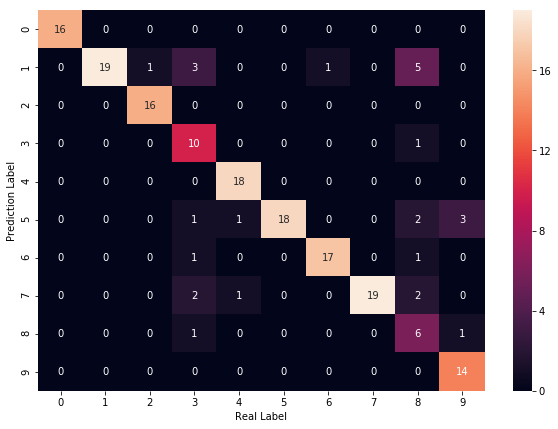

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:23 index:[5] real:5
#1 min_error:33 index:[1] real:2
#2 min_error:27 index:[7] real:8
#3 min_error:7 index:[0] real:0
#4 min_error:19 index:[1] real:1
#5 min_error:18 index:[7] real:7
#6 min_error:20 index:[6] real:6
#7 min_error:22 index:[3] real:3
#8 min_error:16 index:[2] real:2
#9 min_error:22 index:[1] real:1
#10 min_error:33 index:[4 7] real:7
#11 min_error:28 index:[7] real:4
#12 min_error:16 index:[6] real:6
#13 min_error:24 index:[3] real:3
#14 min_error:15 index:[1] real:1
#15 min_error:29 index:[3] real:3
#16 min_error:31 index:[5] real:9
#17 min_error:13 index:[1] real:1
#18 min_error:22 index:[7] real:7
#19 min_error:16 index:[6] real:6
#20 min_error:28 index:[8] real:8
#21 min_error:11 index:[4] real:4
#22 min_error:23 index:[3] real:3
#23 min_error:20 index:[1] real:1
#24 min_error:13 index:[4] real:4
#25 min_error:9 index:[0] real:0
#26 min_error:19 index:[5] real:5
#27 min_error:23 index:[3] real:3
#28 min_error:26 index:[6] real:6
#29 min_error:25 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8880643166357453
Avg Base Learner:0.8010204081632654


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.1111111111111111
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.23333333333333334
Accuracy on training set: 0.3333333333333333
Accuracy on training set: 0.3611111111111111
Accuracy on training set: 0.3888888888888889
Accuracy on training set: 0.37222222222222223
Accuracy on training set: 0.43333333333333335
Accuracy on training set: 0.42777777777777776
Accuracy on training set: 0.43333333333333335
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.4722222222222222
Accuracy on training set: 0.4444444444444444
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5388888888888889
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6333333333333333
Acc

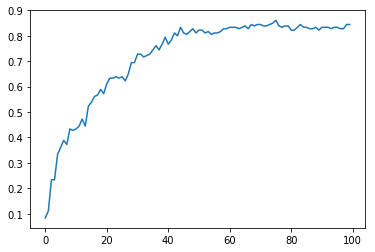

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.08333333333333333,
 0.1111111111111111,
 0.23333333333333334,
 0.23333333333333334,
 0.3333333333333333,
 0.3611111111111111,
 0.3888888888888889,
 0.37222222222222223,
 0.43333333333333335,
 0.42777777777777776,
 0.43333333333333335,
 0.4444444444444444,
 0.4722222222222222,
 0.4444444444444444,
 0.5222222222222223,
 0.5388888888888889,
 0.5611111111111111,
 0.5666666666666667,
 0.5888888888888889,
 0.5722222222222222,
 0.6111111111111112,
 0.6333333333333333,
 0.6333333333333333,
 0.6388888888888888,
 0.6333333333333333,
 0.6388888888888888,
 0.6222222222222222,
 0.65,
 0.6944444444444444,
 0.6944444444444444,
 0.7277777777777777,
 0.7277777777777777,
 0.7166666666666667,
 0.7222222222222222,
 0.7277777777777777,
 0.7444444444444445,
 0.7611111111111111,
 0.7444444444444445,
 0.7666666666666667,
 0.7944444444444444,
 0.7666666666666667,
 0.7833333333333333,
 0.8111111111111111,
 0.8,
 0.8333333333333334,
 0.8111111111111111,
 0.8055555555555556,
 0.8166666666666667,
 0.82777777777